In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
uber_data = pd.read_csv('uber pickups.csv')
uber_data.head()

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


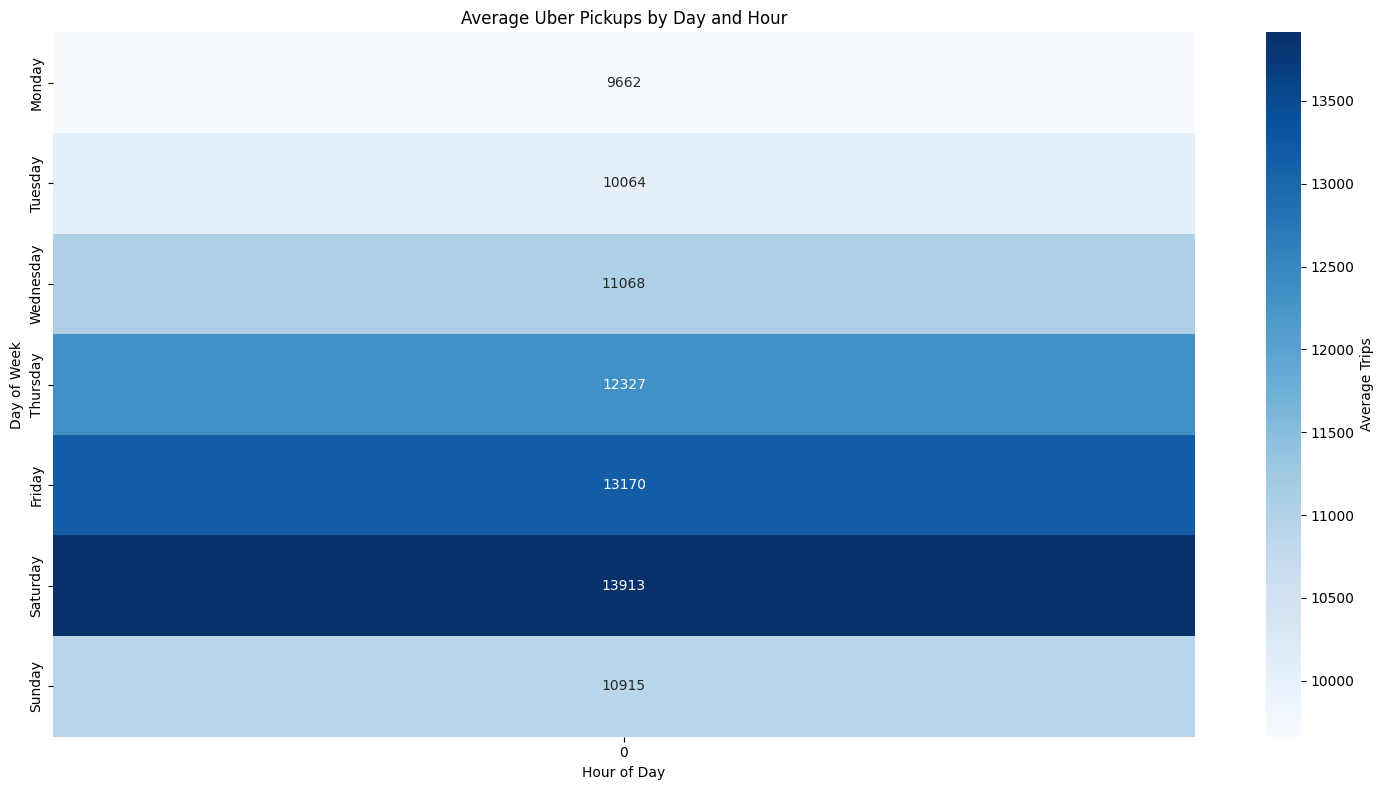

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('uber pickups.csv')
df['date'] = pd.to_datetime(df['date'])
df['day'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour
pivot_data = df.groupby(['day', 'hour'])['trips'].mean().reset_index()
pivot_table = pivot_data.pivot(index='day', columns='hour', values='trips')
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table.reindex(day_order)
plt.figure(figsize=(15, 8))
sns.heatmap(pivot_table, cmap='Blues', annot=True, fmt='.0f', cbar_kws={'label': 'Average Trips'})
plt.title('Average Uber Pickups by Day and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()

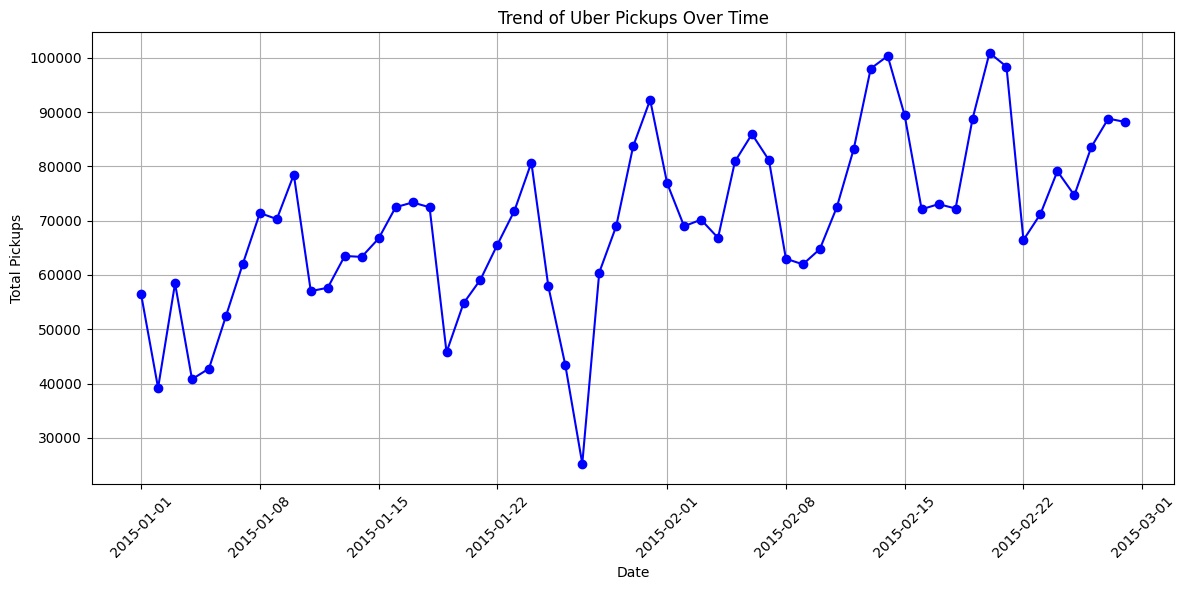

In [ ]:
line_chart_data = uber_data.groupby('date')['trips'].sum()
plt.figure(figsize=(12, 6))
plt.plot(line_chart_data.index, line_chart_data.values, marker='o', linestyle='-', color='b')
plt.title("Trend of Uber Pickups Over Time")
plt.xlabel("Date")
plt.ylabel("Total Pickups")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

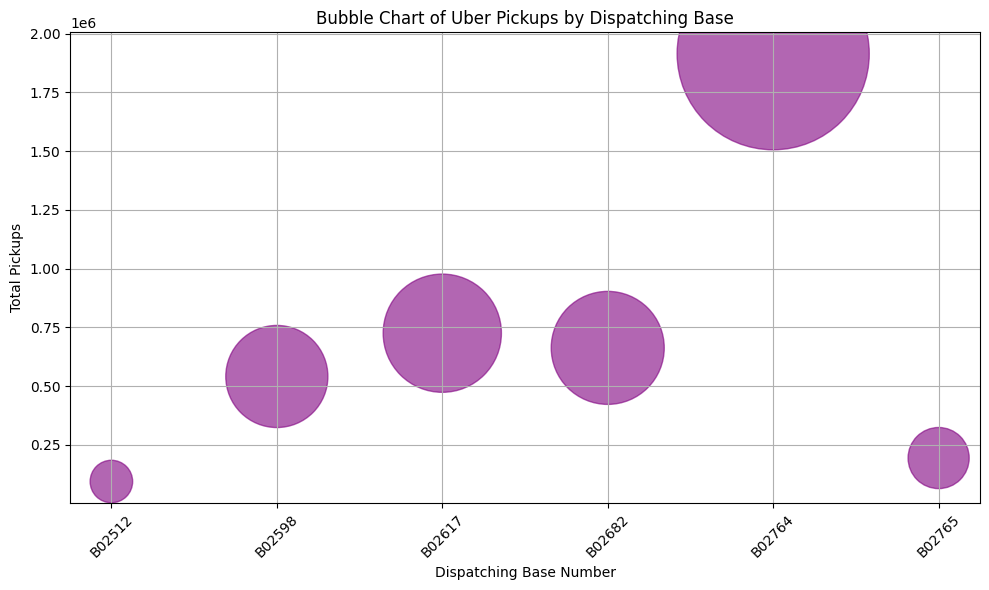

In [ ]:
bubble_chart_data = uber_data.groupby('dispatching_base_number')['trips'].sum()
plt.figure(figsize=(10, 6))
plt.scatter(bubble_chart_data.index, bubble_chart_data.values,
            s=bubble_chart_data.values / 100, alpha=0.6, color='purple')
plt.title("Bubble Chart of Uber Pickups by Dispatching Base")
plt.xlabel("Dispatching Base Number")
plt.ylabel("Total Pickups")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()